<a href="https://colab.research.google.com/github/anirxudh/Deep-Learning-Lab-Tutorial-KTU/blob/main/Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT NO 6
## Anirudh S Nair
### Transfer learning using VGG19

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.applications import VGG19

# Data Loading and Preprocessing

In [2]:
(x_train,y_train),(x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [4]:
x_train=x_train/255
x_test=x_test/255
x_train_rgb=np.repeat(x_train,3,axis=-1)
x_test_rgb=np.repeat(x_test, 3, axis=-1)

In [5]:
x_train_rgb_resized=tf.image.resize(x_train_rgb, (32,32))
x_test_rgb_resized=tf.image.resize(x_test_rgb, (32,32))

In [6]:
x_train_rgb_resized=x_train_rgb_resized.numpy()
x_test_rgb_resized=x_test_rgb_resized.numpy()

# Base Model layer modification

In [7]:
base_model=VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))
for i in base_model.layers:
  i.trainable=False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Model Building and Fitting

In [8]:
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
r=model.fit(x_train_rgb_resized, y_train, epochs=8, validation_data=(x_test_rgb_resized,y_test))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.9127 - loss: 0.2768 - val_accuracy: 0.9710 - val_loss: 0.0920
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9641 - loss: 0.1126 - val_accuracy: 0.9726 - val_loss: 0.0895
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9704 - loss: 0.0880 - val_accuracy: 0.9726 - val_loss: 0.0801
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9753 - loss: 0.0766 - val_accuracy: 0.9758 - val_loss: 0.0760
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9779 - loss: 0.0657 - val_accuracy: 0.9770 - val_loss: 0.0767
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9793 - loss: 0.0619 - val_accuracy: 0.9760 - val_loss: 0.0746
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9821 - loss: 0.0530 - val_accuracy: 0.9756 - val_loss: 0.0794
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9832 - loss: 0

# Plotting and Graphing

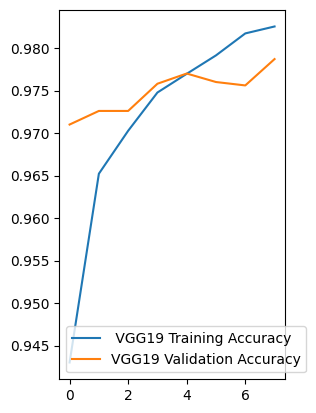

In [11]:
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], label=' VGG19 Training Accuracy')
plt.plot(r.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.legend()
plt.show()

# Prediction

In [15]:
predict=model.predict(x_test_rgb_resized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


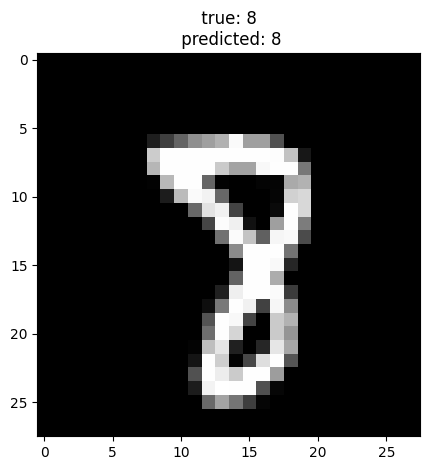

In [23]:
import random
class_names=['0','1','2','3','4','5','6','7','8','9']
class_indices=list(range(10))

image_index= random.randint(0,len(x_test_rgb_resized)-1)
predicted_label=np.argmax(predict[image_index])
plt.imshow(x_test[image_index], cmap='gray')
true_label= y_test[image_index]

plt.title(f' true: {class_names[true_label]} \n predicted: {class_names[predicted_label]}')
plt.tight_layout()
plt.show()
